# Teknik Optimalisasi

# DIFFERENTIAL EVOLUTION

## Import library

In [118]:
import random
import matplotlib.pyplot as plt

## Parameter kontrol

- Different evolution memiliki 3 buah parameter control yaitu ukuran populasi, faktor skala F dan probabilitas crossover CR
- Faktor skala F berfungsi untuk mengatur penguatan difference vektor dan menghindari stagnasi selama proses pencarian 
- Probabilitas crossover CR [0,1] berfungsi untuk mengendalikan laju crossover 

In [119]:
# y = 15x - x^2
N = 3
CR = 0.7 # tidak ada ukuran baku, lebih besar lebih baik, tergantung data
F = 0.5 # nilai tidak ada ukuran baku, antara 0 - 1

## Notasi

Untuk memudahkan, ada notasi yang menyatakan type dari DE yang dinyatakan dengan DE/a/b/c dimana:
- Menyatakan vektor basis yang akan dimutasi
- Menyatakan jumlah selisih vektor yang akan ditambahkan pada vektor basis
- Menyatakan skema crossover 

In [120]:
# DE/rand/1/uniform
#    -> vektor basis acak, 1 vektor difference, CR -> uniform
induk = [0 for i in range(N)]
print(induk)

[0, 0, 0]


## 1. Membangkitkan populasi awal

Dengan mengambil contoh notasi DE/rand/1/uniform pada permasalahan kontinu dengan D-dimensi, procedur DE dapat dijelaskan sebagai berikut: 
- Batas atas 𝐵𝑈 dan batas bawah 𝐵𝐿 dari tiap variabel harus ditentukan 
- Setiap variable j dari individu i diinisialisasi
- Dimana 𝑟𝑎𝑛𝑑 (0,1) yang menyatakan nilai random dengan distribusi uniform dalam rentang [0,1) 

In [121]:
BU = 15 # boundary up
BL = 0 # boundary low

for i in range(N):
    induk[i] = random.random() * ((BU - BL) + BL)

print(induk)

[4.778531263873665, 6.9595325485877195, 5.967943505086215]


## Buat Function

### Hitung fitness

In [122]:
def hitungFitness(x):
    y = 15 * x - x*2
    return y

## 2. Definisi variable epochs dan counter (ctr)

### Menentukan nilai epochs

Tidak ada ketentuan untuk menentukan nilai epochs, based on experience

In [123]:
ctr = 1 # counter
epochs = 50
MaxFitness = [0 for i in range(epochs)]
print(MaxFitness)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Hitung dulu nilai fitness untuk induk

In [124]:
for j in range(N):
    if (hitungFitness(induk[j]) > MaxFitness[0]):
        MaxFitness[0] = hitungFitness(induk[j])
print(MaxFitness)

[90.47392313164036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 3. While sebelum kriteria berhenti

### Seleksi -> Reproduksi -> Elitism

In [125]:
D = 1
while ctr < epochs:
    for i in range(N):
        jrand = int(random.random()*D) #+1
        for j in range(D):
            # Reproduksi
            a = random.random()
            # Cek crossover
            if (a <= CR or j == jrand):
                # Mutasi
                # mengambil vektor basis secara acak
                xr = induk[random.randint(0, (N-1))]
                anak = xr + F * induk[i]
            else:
                anak = induk[i]
        # Elitism
        if (hitungFitness(anak) > hitungFitness(induk[i])):
            induk[i] = anak
    print(induk)

    for i in range(N):
        if (hitungFitness(induk[i]) > MaxFitness[ctr]):
            MaxFitness[ctr] = hitungFitness(induk[i])
            print(MaxFitness[ctr])

    ctr += 1

[8.357209137023048, 10.439298822881579, 13.423270575424686]
108.64371878129963
135.71088469746053
174.50251748052094
[12.535813705534572, 15.658948234322368, 20.13490586313703]
162.96557817194946
203.5663270461908
261.7537762207814
[18.80372055830186, 23.488422351483553, 28.871173489870372]
244.44836725792416
305.34949056928616
375.32525536831486
[32.89028263063448, 40.61538466561215, 55.050971410547334]
427.5736741982482
528.0000006529579
715.6626283371153
[49.33542394595172, 75.3586637433534, 82.576457115821]
641.3605112973723
979.6626286635942
1073.493942505673
[100.02637571632926, 137.70570758800596, 178.99393614591645]
1300.3428843122801
1790.1741986440775
2326.921169896914
[229.00712400408108, 247.84678993991943, 268.4909042188747]
2977.092612053054
3222.0082692189526
3490.381754845371
[382.9944662209152, 506.91786119087493, 402.736356328312]
4978.928060871898
6589.932195481374
[698.4150943013326, 656.1952869237494, 899.7832724654886]
9079.396225917324
11697.182542051352
[1005.40

## Output

range(0, 50)


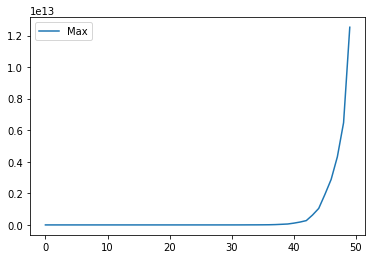

In [126]:
x = range(epochs)
print (x)
plt.plot(x, MaxFitness, label='Max')
plt.legend() #plt.legend(true)

## Alfendio Alif Faudisyah - 672019222 - FTI UKSW